## Question 2: Maxwell-Boltzmann Distribution

The surface of a star at $T = 10,000$ K has hydrogen atoms whose speeds follow 
the Maxwell-Boltzmann distribution:

$$f(v)\,dv = \left(\frac{m}{2\pi k T}\right)^{3/2} 4\pi v^2 \exp\left(-\frac{mv^2}{2kT}\right)dv$$


In [12]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16, 'figure.figsize': (10, 6)})

In [13]:
# Defining the Maxwell Distribution Function

def distribution_fun(v,m=1.67e-27,T=10000):
    k = 1.380649e-23 #  Boltzmann Constant in (m^2 kg) / (s^2 K)
    f = (m/(2 * np.pi * k * T))**(3/2) * 4 * np.pi * v**2 * np.exp((-m * v**2)/(2 * k * T))
    return f

### Part (a): Plotting the Distribution

The distribution is plotted along with three characteristic speeds:
- Most probable speed $v_p = \sqrt{2kT/m}$
- Average speed ${v_{avg}} = \sqrt{8kT/\pi m}$  
- RMS speed $v_{rms} = \sqrt{3kT/m}$

The most probable speed is 12858.740 m/s
The average speed is 14509.534 m/s
The rms speed is 15748.675 m/s


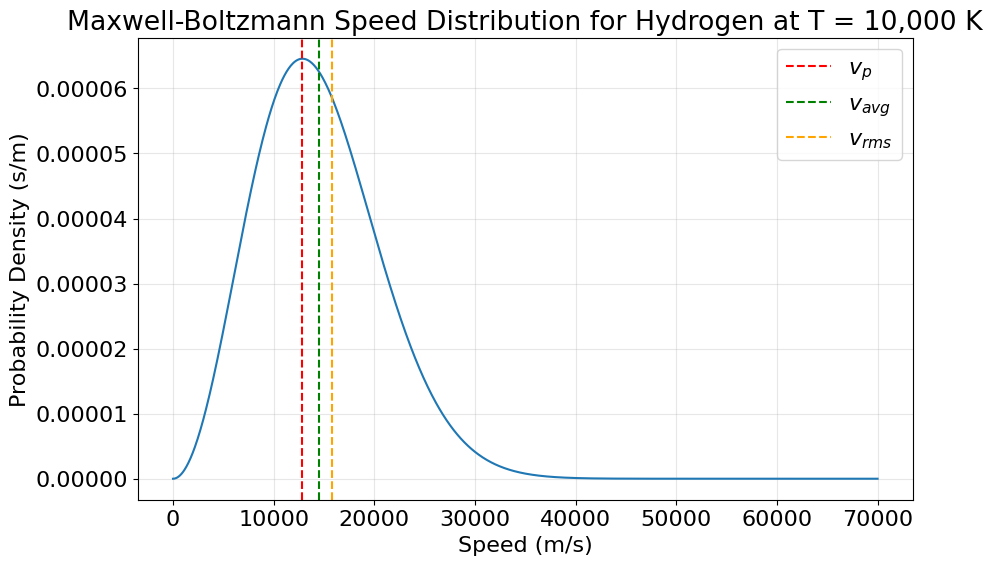

In [14]:
m = 1.67e-27 #in Kg
T = 10000 #in K
k = 1.380649e-23 #Boltzmann Constant in (m^2 kg) / (s^2 K)

v = np.linspace(0,70000,1000)

vp = np.sqrt((2 * k * T)/m) # Most probable Speed
v_avg = np.sqrt((8 * k * T)/ (np.pi * m)) # Average Speed
vrms = np.sqrt((3 * k * T)/m) # Root mean squared speed

print(f"The most probable speed is {vp:.3f} m/s")
print(f"The average speed is {v_avg:.3f} m/s")
print(f"The rms speed is {vrms:.3f} m/s")

fv = distribution_fun(v,m,T)
plt.plot(v,fv)
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density (s/m)")
plt.title("Maxwell-Boltzmann Speed Distribution for Hydrogen at T = 10,000 K")
plt.ticklabel_format(style='plain', axis='y')
plt.axvline(x=vp, color='red', linestyle='--', label='$v_p$')
plt.axvline(x=v_avg, color='green', linestyle='--', label='$v_{avg}$')
plt.axvline(x=vrms, color='orange', linestyle='--', label='$v_{rms}$')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

### Part (b): Fraction of Atoms Able to Excite Hydrogen

The minimum kinetic energy required to excite hydrogen from $n=1$ to $n=2$ is:

$$\Delta E = -13.6\left(\frac{1}{4}-1\right) \text{ eV} = 10.2 \text{ eV}$$

The corresponding minimum speed is $v_{min} = \sqrt{2\Delta E/m}$. The fraction 
of atoms with sufficient speed is obtained by integrating the MB distribution 
from $v_{min}$ to $\infty$:

$$F = \int_{v_{min}}^{\infty} f(v)\,dv$$

In [15]:
e = 1.6e-19
E_min = -13.6*((1/4) - 1) * e #in Joules. This is the minimum kinetic energy required to excite the atom from n = 1 to n = 2 state
print(f"The minimum energy required to excite the atom from n = 1 to n = 2 state is {E_min:.3e} Joules.")
v_min = np.sqrt((2 * E_min)/m)
print(f"The minimum speed {v_min:.3f} m/s.")


The minimum energy required to excite the atom from n = 1 to n = 2 state is 1.632e-18 Joules.
The minimum speed 44209.626 m/s.


In [16]:
# Defining RK4 Method

def rk4(x0,y0,h,n_steps,func):
    x = [x0]
    y = [y0]

    for i in range(n_steps):
        k1 = func(x0,y0)
        k2 = func(x0 + (0.5 * h), y0 + (0.5 * h * k1))
        k3 = func(x0 + (0.5 * h), y0 + (0.5 * h * k2))
        k4 = func(x0 + h, y0 + (h * k3))
        y_new = y0 + (h/6) * (k1 + (2*k2) + (2*k3) + k4)
        x_new = x0 + h
        x0 = x_new
        y0 = y_new
        x.append(x_new)
        y.append(y_new)
    return x,y

In [17]:
def integrand(v, y):
    return distribution_fun(v)

Fraction of atoms that can excite hydrogen: 2.976373e-05


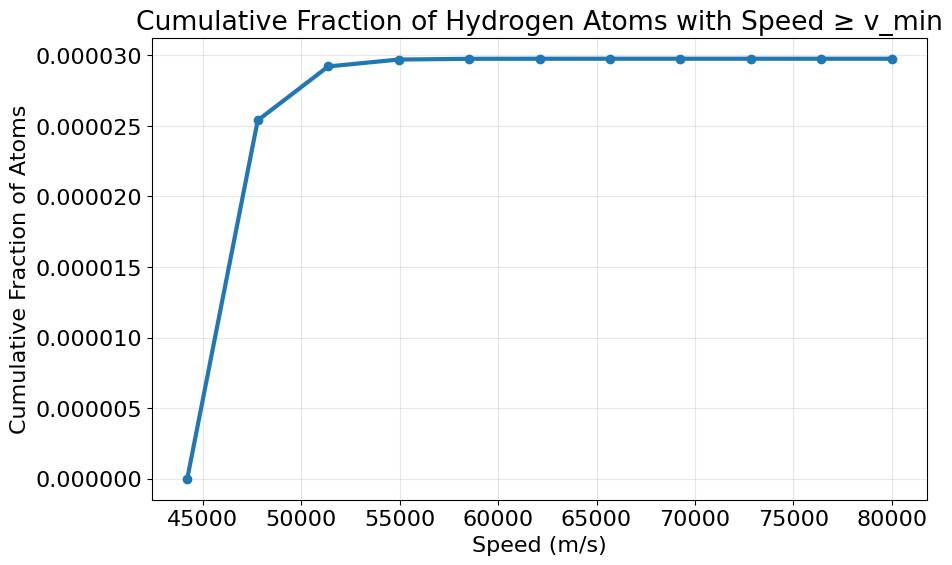

In [18]:
v_max = 80000
x0 = v_min
y0 = 0
xf = v_max
n=10
h = (xf - x0)/n

x, y = rk4(x0, y0, h, n, integrand)

print(f"Fraction of atoms that can excite hydrogen: {y[-1]:.6e}")

plt.plot(x, y, '-o',linewidth = 3)
plt.xlabel("Speed (m/s)")
plt.ylabel("Cumulative Fraction of Atoms")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Cumulative Fraction of Hydrogen Atoms with Speed ≥ v_min")
plt.grid(True, which='both', alpha=0.3)
plt.show()


### Part (c): Precision Analysis

Two sources of error are studied:
1. Step-size error — how h affects the result
2. Truncation error — how the choice of v_max affects the result

In [19]:
x0 = v_min
y0 = 0
xf = v_max

h_list = [] 

frac_err_rk4 = []
result_rk4=[]


for i in range(15):
    h_val = 1000 / 2**i
    h_list.append(h_val)


for h in h_list:
    n = int((xf - x0)/h)
    x3, y3 = rk4(x0, y0, h, n, integrand)
    result_rk4.append(y3[-1])
    

for i in range(len(h_list)):
    err_rk4 = np.abs((result_rk4[i]-result_rk4[-1])/(result_rk4[-1]))
    frac_err_rk4.append(err_rk4)


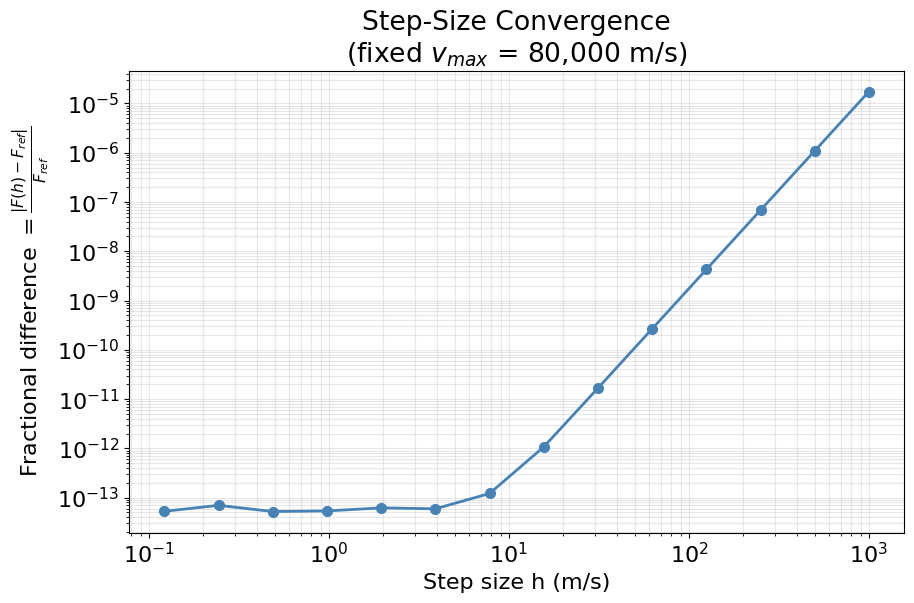

In [20]:
# Plot 1: Step-size convergence 

plt.figure(figsize=(10, 6))
plt.loglog(h_list[:-1], frac_err_rk4[:-1], 'o-', color='steelblue',
           linewidth=2, markersize=7)
plt.xlabel("Step size h (m/s)")
plt.ylabel("Fractional difference $= \\frac{|F(h) - F_{ref}|}{F_{ref}}$", fontsize=16)
plt.title("Step-Size Convergence\n(fixed $v_{max}$ = 80,000 m/s)")
plt.grid(True, which='both', alpha=0.3)


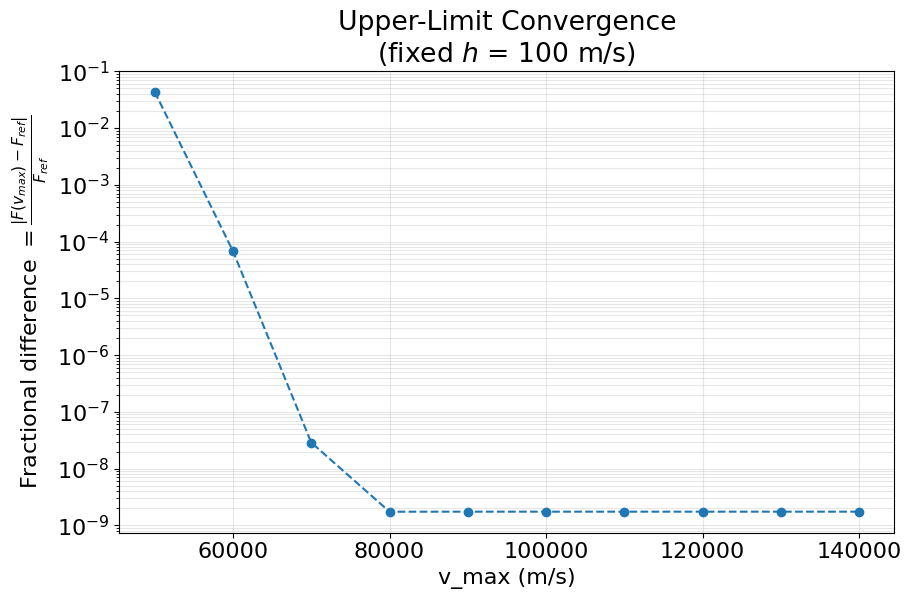

In [21]:
h_coarse = 100  
h_fine = 10      # reference computed once with fine h at large v_max

# Compute reference with FINE h at large v_max
n_ref = int((150000 - v_min) / h_fine)
_, y_ref = rk4(v_min, 0.0, h_fine, n_ref, integrand)
ref = y_ref[-1]  # ← true reference

# Now vary v_max with COARSE h
xf = np.linspace(50000,140000,10)
result = []
for v_max_i in xf:
    n = max(1, int((v_max_i - v_min) / h_coarse))
    _, y = rk4(v_min, 0.0, h_coarse, n, integrand)
    result.append(y[-1])

# Compare against fine-h reference
frac_err = [abs((r - ref)/ref) for r in result]

plt.plot(xf, frac_err, '--o')
plt.xlabel("v_max (m/s)")
plt.ylabel("Fractional difference $= \\frac{|F(v_{max}) - F_{ref}|}{F_{ref}}$", fontsize=16)
plt.yscale("log")
plt.title(f"Upper-Limit Convergence\n(fixed $h$ = {h_coarse} m/s)")
plt.grid(True, which='both',alpha = 0.3)
plt.show()

In [22]:
print(f"Reference value (fine h, large v_max): {ref:.6e}")
print(f"Step-size error (finest h):             {frac_err_rk4[-2]:.3e}")
print(f"Truncation error (largest v_max):       {frac_err[-1]:.3e}")
print(f"Total uncertainty (quadrature):         {np.sqrt(frac_err_rk4[-2]**2 + frac_err[-1]**2):.3e}")
print(f"Final result: {ref:.6e} ± {np.sqrt(frac_err_rk4[-2]**2 + frac_err[-1]**2) * ref:.2e}")

Reference value (fine h, large v_max): 2.968307e-05
Step-size error (finest h):             5.285e-14
Truncation error (largest v_max):       1.748e-09
Total uncertainty (quadrature):         1.748e-09
Final result: 2.968307e-05 ± 5.19e-14
